# Comparison of 3 Decision tree algorithms
## (Refer to http://www.dodomira.com/2016/05/29/564/)
### 3가지 패키지는 가지치기 방법따라 다름

tree 패키지는 binary recursive partitioning을,  rpart 패키지는 CART(classification and regression trees) 방법론을 사용합니다. 이 패키지들은 엔트로피, 지니계수를 기준으로 가지치기를 할 변수를 결정하기 때문에 상대적으로 연산 속도는 빠르지만 과적합화의 위험성이 존재합니다. 그래서 두 패키지를 사용할 경우에는 Pruning 과정을 거쳐서 의사결정나무를 최적화 하는 과정이 필요합니다.

party 패키지는 Unbiased recursive partitioning based on permutation tests 방법론을 사용합니다. p-test를 거친 Significance를 기준으로 가지치기를 할 변수를 결정하기 때문에 biased 될 위험이 없어 별도로 Pruning할 필요가 없다는 장점이 있습니다. 대신 입력 변수의 레벨이 31개 까지로 제한되어 있다는 단점이 있죠.

### R has many different packages having same or similar algorithms. Three representative packages having decision tree algorithms are:
### 1. rpart package - recursive partitioning based on Gini and entropy, pruning needed(overfitting 때문에)
### 2. tree package - CART based on Gini and entropy, pruning needed
### 3. party package - Unbiased recursive partitioning based on permutation tests(p-test), pruning not needed

## Read in Heart.csv data and show structure

In [10]:
df<-read.csv('http://www-bcf.usc.edu/~gareth/ISL/Heart.csv')
str(df)
#obs 행 AHD 심장 질환 여부(타겟 변수로 될꺼임) 

'data.frame':	303 obs. of  15 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Age      : int  63 67 67 37 41 56 62 57 63 53 ...
 $ Sex      : int  1 1 1 1 0 1 0 0 1 1 ...
 $ ChestPain: Factor w/ 4 levels "asymptomatic",..: 4 1 1 2 3 3 1 1 1 1 ...
 $ RestBP   : int  145 160 120 130 130 120 140 120 130 140 ...
 $ Chol     : int  233 286 229 250 204 236 268 354 254 203 ...
 $ Fbs      : int  1 0 0 0 0 0 0 0 0 1 ...
 $ RestECG  : int  2 2 2 0 2 0 2 0 2 2 ...
 $ MaxHR    : int  150 108 129 187 172 178 160 163 147 155 ...
 $ ExAng    : int  0 1 1 0 0 0 0 1 0 1 ...
 $ Oldpeak  : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ Slope    : int  3 2 2 3 1 1 3 1 2 3 ...
 $ Ca       : int  0 3 2 0 0 0 2 0 1 0 ...
 $ Thal     : Factor w/ 3 levels "fixed","normal",..: 1 2 3 2 2 2 2 2 3 3 ...
 $ AHD      : Factor w/ 2 levels "No","Yes": 1 2 2 1 1 1 2 1 2 2 ...


In [2]:
head(df)

X,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No
6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0,normal,No


## Partition data into train and test using caret package

In [7]:
#install.packages('caret', repos='http://cran.us.r-project.org')
library(caret)#caret은 데이터 셋 나눌려고
set.seed(100) #reproducability setting 랜덤숫자 가져오기
intrain<-createDataPartition(y=df$AHD, p=0.7, list=FALSE) 
train<-df[intrain, ]
test<-df[-intrain, ]#거기 업는 index들

# [rpart]
## Load rpart package and produce decision tree

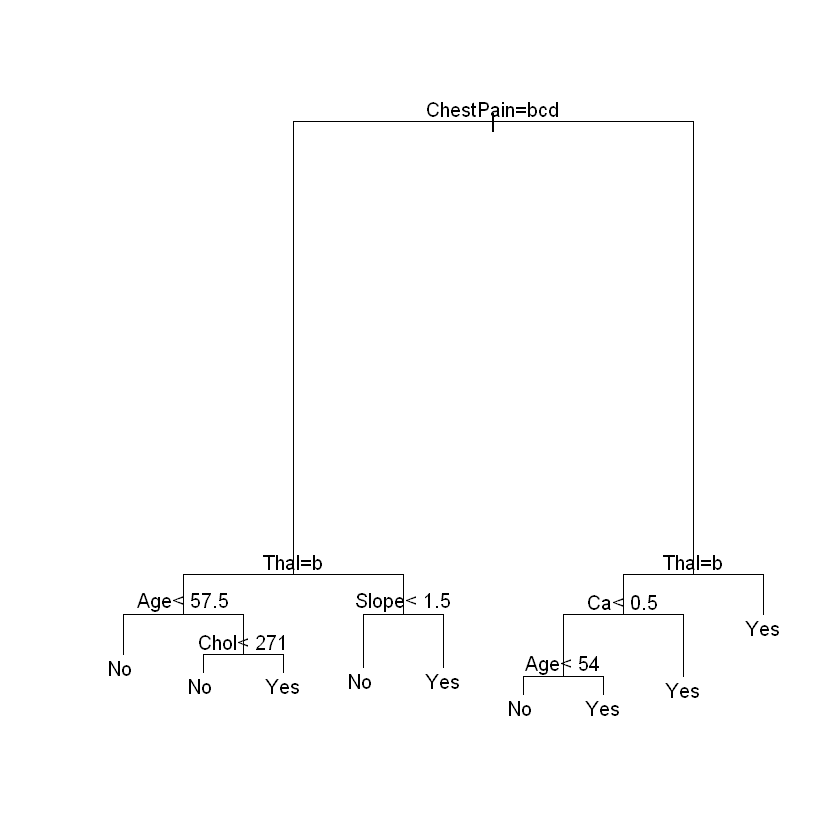

In [9]:
#install.packages('rpart', repos='http://cran.us.r-project.org')
library(rpart)
rpartmod<-rpart(AHD~. , data=train, method="class")
plot(rpartmod)
text(rpartmod)

## Do k-fold cross validation for various k and gives number of splits yielding min misclass error 가장 합당한 k값으로 프루닝


Classification tree:
rpart(formula = AHD ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] Age       Ca        ChestPain Chol      Slope     Thal     

Root node error: 98/213 = 0.46009

n= 213 

        CP nsplit rel error  xerror     xstd
1 0.520408      0   1.00000 1.00000 0.074224
2 0.035714      1   0.47959 0.56122 0.065177
3 0.030612      3   0.40816 0.59184 0.066292
4 0.020408      5   0.34694 0.55102 0.064786
5 0.010204      6   0.32653 0.54082 0.064385
6 0.010000      8   0.30612 0.54082 0.064385


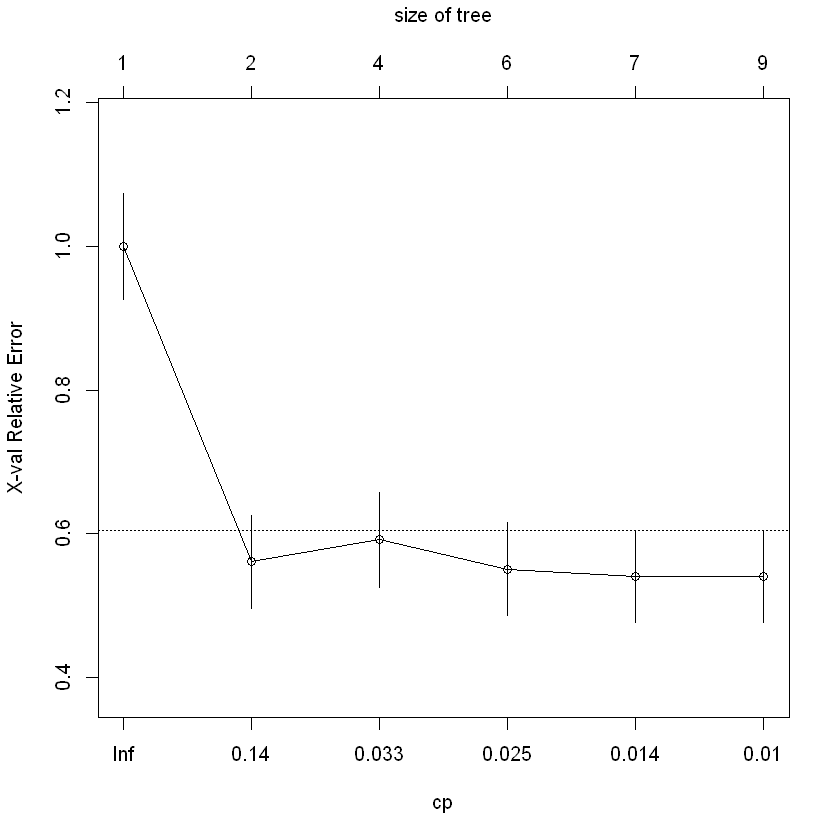

In [24]:
printcp(rpartmod)#cross validation 함수
plotcp(rpartmod)

## 그래프 보면 6에서 가장 낮음

## Do pruning with chosen number of splits
### rpart진행항 rpartmod에서 crossvalidation한 table에서 min 값을 찾아내서 (xerror값(y축,x축) 프루닝함

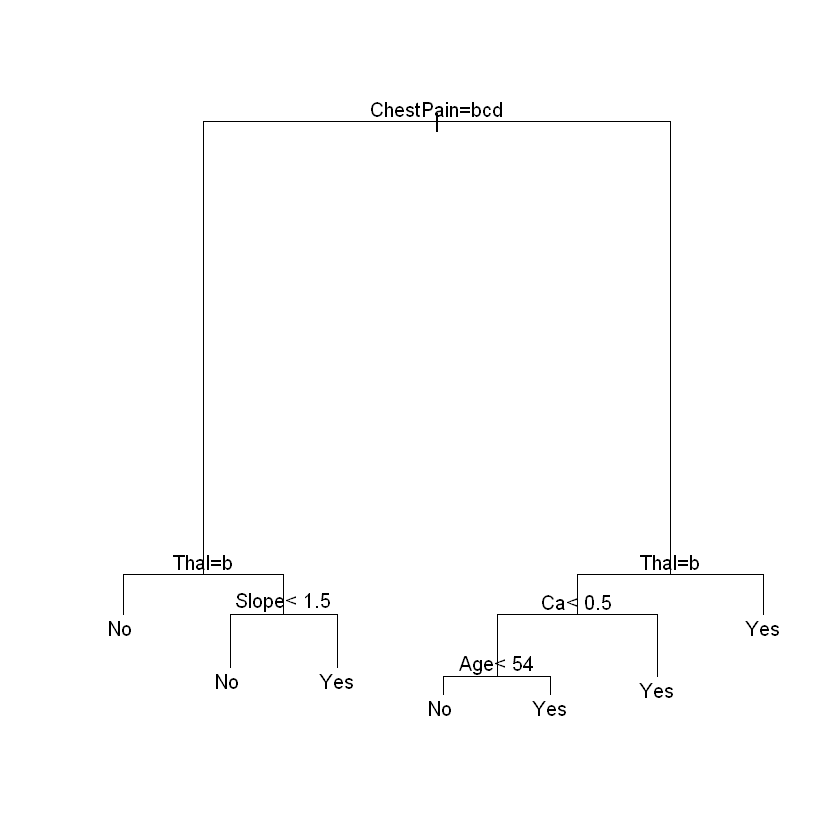

In [25]:
ptree<-prune(rpartmod, cp= rpartmod$cptable[which.min(rpartmod$cptable[,"xerror"]),"CP"])
plot(ptree)
text(ptree)

## Do prediction with test data and show statistics
### ptree는 프루닝된 트리. 테스트 값으로 이제 됐늕 안됐는지

In [26]:
rpartpred<-predict(ptree, test, type='class')#프루닝된 tree에서 test가지고
confusionMatrix(rpartpred, test$AHD)# reference는 원래 값 yes yes nono가 예측이 정확히 된 거
# kappa는 random으로 yes no 준 거. random으로 준 데이터보다 낮다면 우리가 한 게 별 효과가 없다. 

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  34   5
       Yes 15  36
                                          
               Accuracy : 0.7778          
                 95% CI : (0.6779, 0.8587)
    No Information Rate : 0.5444          
    P-Value [Acc > NIR] : 3.689e-06       
                                          
                  Kappa : 0.5608          
 Mcnemar's Test P-Value : 0.04417         
                                          
            Sensitivity : 0.6939          
            Specificity : 0.8780          
         Pos Pred Value : 0.8718          
         Neg Pred Value : 0.7059          
             Prevalence : 0.5444          
         Detection Rate : 0.3778          
   Detection Prevalence : 0.4333          
      Balanced Accuracy : 0.7860          
                                          
       'Positive' Class : No              
                                          

# [tree]
## Load tree package and produce decision tree

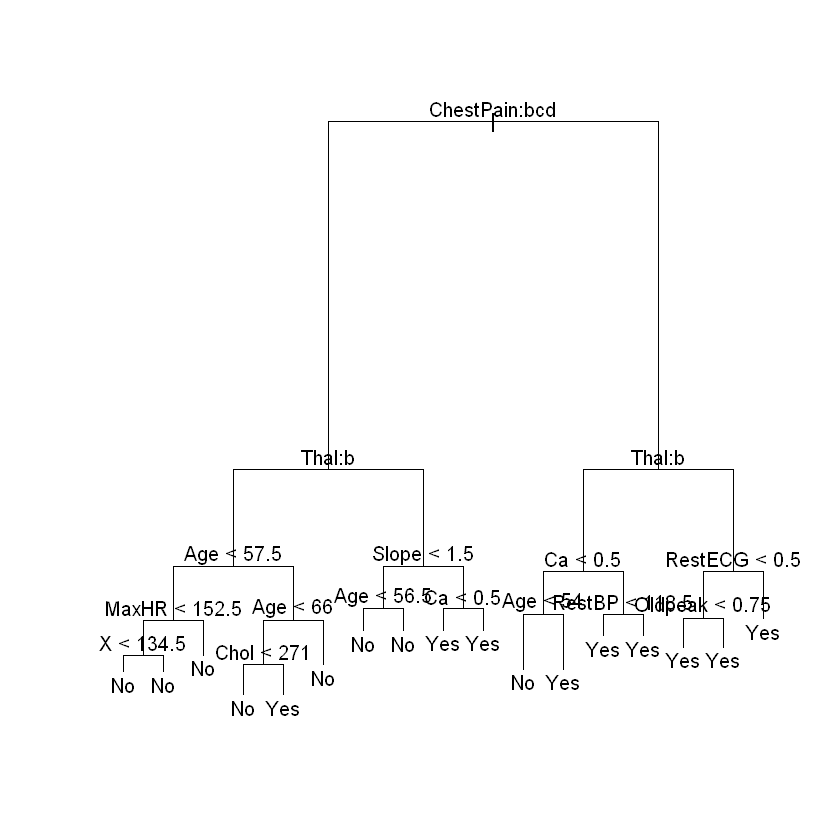

In [27]:
library(tree)
treemod<-tree(AHD~. , data=train)
plot(treemod)
text(treemod)

## Do k-fold cross validation for various k and gives k yielding min misclass error

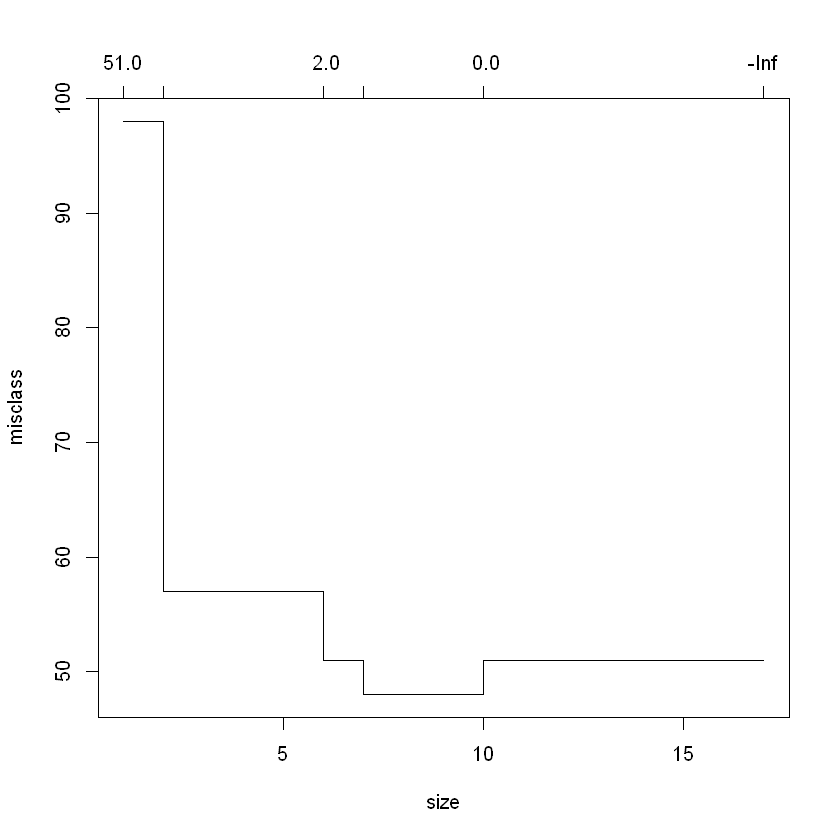

In [28]:
cv.trees<-cv.tree(treemod, FUN=prune.misclass ) # for classification decision tree
plot(cv.trees)

## Do pruning with chosen k

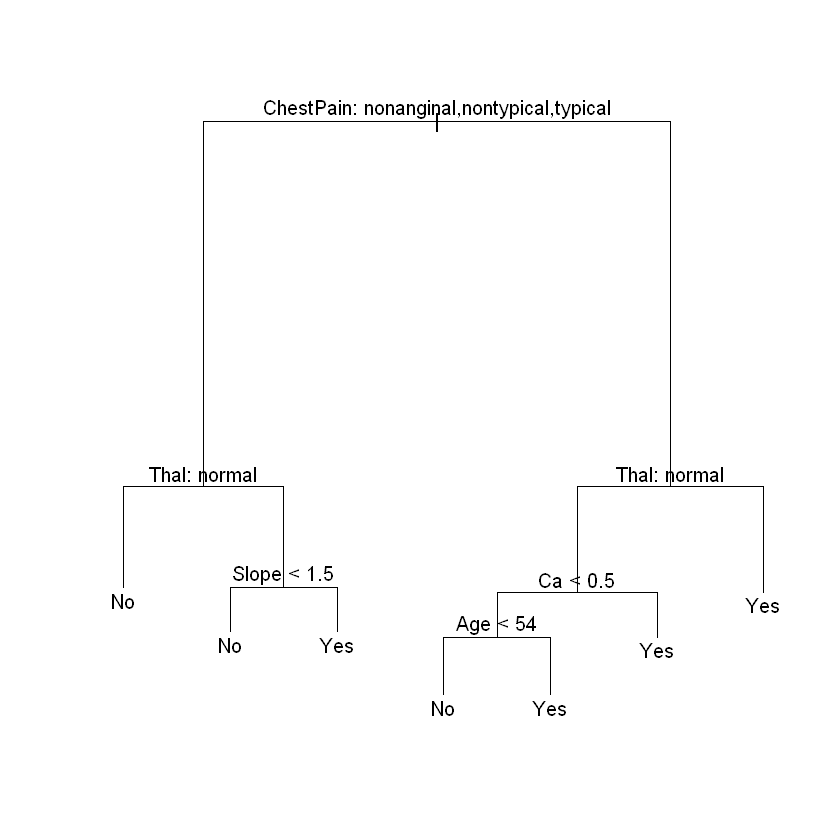

In [29]:
prune.trees <- prune.misclass(treemod, best=7)  # for regression decision tree, use prune.tree function
plot(prune.trees)
text(prune.trees, pretty=0)

## Do prediction with test data and show statistics

In [30]:
library(e1071)
treepred <- predict(prune.trees, test, type='class')
confusionMatrix(treepred, test$AHD)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  34   5
       Yes 15  36
                                          
               Accuracy : 0.7778          
                 95% CI : (0.6779, 0.8587)
    No Information Rate : 0.5444          
    P-Value [Acc > NIR] : 3.689e-06       
                                          
                  Kappa : 0.5608          
 Mcnemar's Test P-Value : 0.04417         
                                          
            Sensitivity : 0.6939          
            Specificity : 0.8780          
         Pos Pred Value : 0.8718          
         Neg Pred Value : 0.7059          
             Prevalence : 0.5444          
         Detection Rate : 0.3778          
   Detection Prevalence : 0.4333          
      Balanced Accuracy : 0.7860          
                                          
       'Positive' Class : No              
                                          

# [party]
## Load party package and produce decision tree

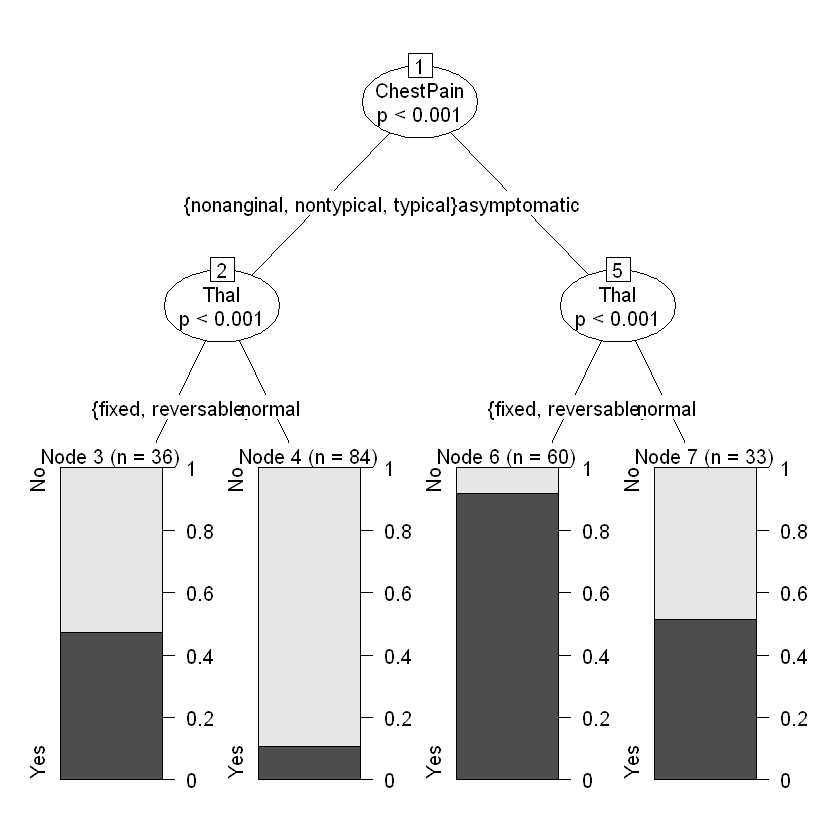

In [31]:
library(party)
partymod<-ctree(AHD~., data=train)
plot(partymod)

## Do prediction with test data and show statistics

In [32]:
partypred<-predict(partymod, test)
confusionMatrix(partypred, test$AHD)  

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  31   8
       Yes 18  33
                                         
               Accuracy : 0.7111         
                 95% CI : (0.606, 0.8018)
    No Information Rate : 0.5444         
    P-Value [Acc > NIR] : 0.0008961      
                                         
                  Kappa : 0.429          
 Mcnemar's Test P-Value : 0.0775562      
                                         
            Sensitivity : 0.6327         
            Specificity : 0.8049         
         Pos Pred Value : 0.7949         
         Neg Pred Value : 0.6471         
             Prevalence : 0.5444         
         Detection Rate : 0.3444         
   Detection Prevalence : 0.4333         
      Balanced Accuracy : 0.7188         
                                         
       'Positive' Class : No             
                                         